### Keras: MNIST example
This example is taken from [keras documentation](https://keras.io/getting_started/intro_to_keras_for_engineers/)
<hr/>

### Import:
First of all we are going to import all the liberies:

In [5]:
import numpy as np # for managing matrix and numbers 
import matplotlib.pyplot as mp # for representing the data in a visual way
import os # for seting up the back end of keras with tensorflow
os.environ["KERAS_BACKEND"] = "torch"
# before import keras, is important to set up the enviroment
import keras as kr

<hr/>

### Get the dataframe:
Now we get the dataframe from keras:

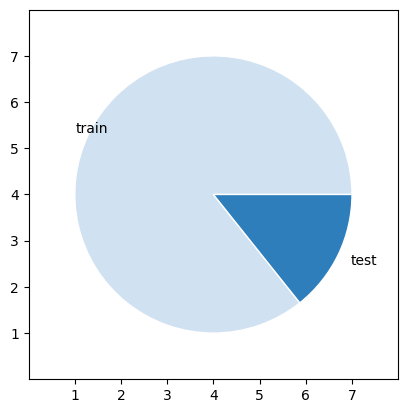

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
60000 train samples
10000 test samples


In [6]:
# download the dataframe
(x_train, y_train), (x_test, y_test) = kr.datasets.mnist.load_data() # we save it in to two tuples: one for training and the other for testing

# normalize the data (pass from colors [0,255] to [0,1])
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# enshure the data is in the correct format
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

colors = mp.get_cmap('Blues')(np.linspace(0.2, 0.7, len((x_train.shape[0], x_test.shape[0]))))

fig, ax = mp.subplots()
ax.pie((x_train.shape[0], x_test.shape[0]),
       labels=("train","test"),
       colors=colors,
       radius=3,
       center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

mp.show()

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

<hr/>

### Build the model:

now we need to give shape to the model:

In [7]:
num_classes = 10 # number of the outputs: 1,2,3...10
input_shape = (28, 28, 1) # input neurons (28x28 images 1 gray scale) 

model = kr.Sequential( # tipe of model 
    [
        kr.layers.Input(shape=input_shape), # input
        kr.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"), # hiden
        kr.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        kr.layers.MaxPooling2D(pool_size=(2, 2)),
        kr.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        kr.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        kr.layers.GlobalAveragePooling2D(),
        kr.layers.Dropout(0.5),
        kr.layers.Dense(num_classes, activation="softmax"), # output
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260,298 (1016.79 KB)

 Trainable params: 260,298 (1016.79 KB)

 Non-trainable params: 0 (0.00 B)

<hr/>

### Compile:

Now we need to copile this code to let tensorflow understand it:

In [8]:
model.compile(
    loss=kr.losses.SparseCategoricalCrossentropy(),
    optimizer=kr.optimizers.Adam(learning_rate=1e-3),
    metrics=[
        kr.metrics.SparseCategoricalAccuracy(name="acc"),
    ],
)

<hr/>

### Fit time:

now that we have our model build it, it's time to train it:

In [9]:
batch_size = 128 # the number of data to predict until changing the values from the model
epochs = 20 # number of times they're going to repeat this process

callbacks = [
    kr.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    kr.callbacks.EarlyStopping(monitor="val_loss", patience=2),
]

model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15,
    callbacks=callbacks,
)
score = model.evaluate(x_test, y_test, verbose=0)
print(score)


Epoch 1/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - acc: 0.5082 - loss: 1.3661 - val_acc: 0.9620 - val_loss: 0.1363
Epoch 2/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - acc: 0.9239 - loss: 0.2549 - val_acc: 0.9781 - val_loss: 0.0788
Epoch 3/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - acc: 0.9516 - loss: 0.1636 - val_acc: 0.9823 - val_loss: 0.0663
Epoch 4/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - acc: 0.9631 - loss: 0.1287 - val_acc: 0.9866 - val_loss: 0.0480
Epoch 5/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - acc: 0.9700 - loss: 0.1020 - val_acc: 0.9869 - val_loss: 0.0436
Epoch 6/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - acc: 0.9731 - loss: 0.0936 - val_acc: 0.9890 - val_loss: 0.0417
Epoch 7/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - acc: 0.9767 - loss: 0.0784 - val_acc: 0.9910 - val_loss: 0.0345
Epoch 8/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - acc: 0.9777 - loss: 0.0750 - val_acc: 0.9900 - val_loss: 0.0340
Epoch 9/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms

<hr/>

### Save the model:

Once the model is done we need to save it and then we can load:

In [10]:
model.save(".\\models\\final_model.keras")
model = kr.saving.load_model(".\\models\\final_model.keras")

<hr/>

### The Prediction:

Lastly, we are going to make a prediction to see the results:

In [11]:
predictions = model.predict(x_test)
print("--example--")
print(predictions[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
--example--
[9.5241703e-10 5.6174004e-10 9.4216216e-07 1.5976388e-08 1.0375290e-09
 7.0828260e-10 3.7968614e-16 9.9996209e-01 1.7784355e-10 3.6911155e-05]
